In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


In [27]:
# Load dataset
df = pd.read_excel("D:\karthik\Aml\LAB 5\marketing_campaign.xlsx")

print(df.shape)
print(df.head())


<>:2: SyntaxWarning: invalid escape sequence '\k'
<>:2: SyntaxWarning: invalid escape sequence '\k'
C:\Users\MSIS\AppData\Local\Temp\ipykernel_10088\3528933449.py:2: SyntaxWarning: invalid escape sequence '\k'
  df = pd.read_excel("D:\karthik\Aml\LAB 5\marketing_campaign.xlsx")


(2240, 29)
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0   

In [28]:
# Select only numeric columns
df_num = df.select_dtypes(include=np.number)

# Handle missing values
df_num = df_num.fillna(df_num.mean())

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(df_num)


In [29]:
X_train, X_val = train_test_split(
    X, test_size=0.2, random_state=42
)


In [30]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_train)

    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_train, labels))


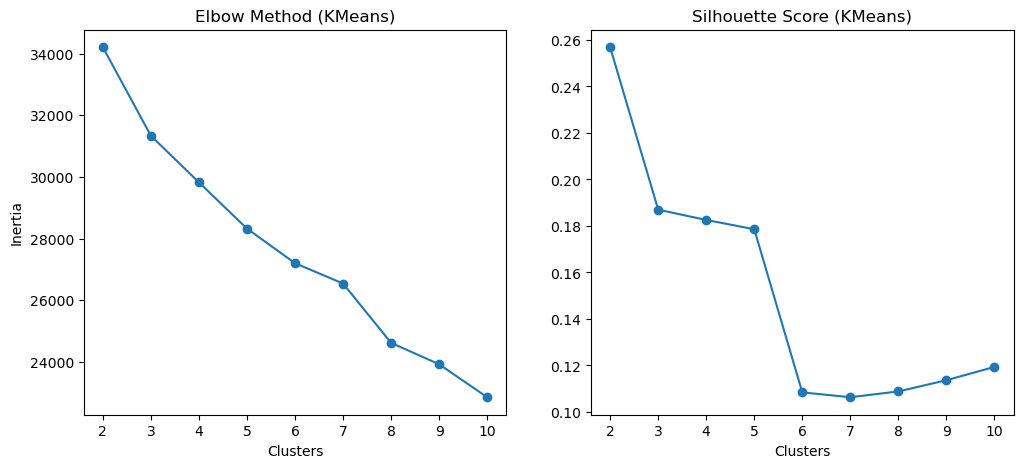

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method (KMeans)")
plt.xlabel("Clusters")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o')
plt.title("Silhouette Score (KMeans)")
plt.xlabel("Clusters")

plt.show()


In [32]:
best_k = K[np.argmax(silhouette)]
print("Optimal clusters for KMeans:", best_k)


Optimal clusters for KMeans: 2


In [33]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_train)

train_labels_km = kmeans.predict(X_train)
val_labels_km = kmeans.predict(X_val)

train_sil_km = silhouette_score(X_train, train_labels_km)
val_sil_km = silhouette_score(X_val, val_labels_km)

print("KMeans Train Silhouette:", train_sil_km)
print("KMeans Val Silhouette  :", val_sil_km)


KMeans Train Silhouette: 0.25684349047594984
KMeans Val Silhouette  : 0.23567271161441486


In [34]:
bic = []
aic = []

for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train)
    bic.append(gmm.bic(X_train))
    aic.append(gmm.aic(X_train))


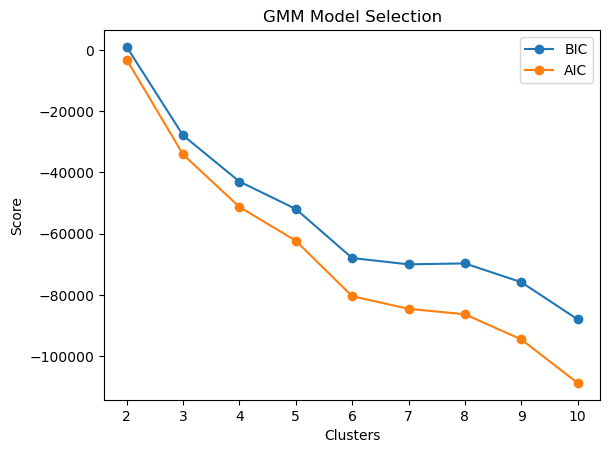

In [35]:
plt.plot(K, bic, label="BIC", marker='o')
plt.plot(K, aic, label="AIC", marker='o')
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("GMM Model Selection")
plt.legend()
plt.show()


In [36]:
best_k_gmm = K[np.argmin(bic)]
print("Optimal clusters for GMM:", best_k_gmm)


Optimal clusters for GMM: 10


In [37]:
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42)
gmm.fit(X_train)

train_ll = gmm.score(X_train)   # log-likelihood
val_ll = gmm.score(X_val)

print("GMM Train Log-Likelihood:", train_ll)
print("GMM Val Log-Likelihood  :", val_ll)


GMM Train Log-Likelihood: 32.43898690478322
GMM Val Log-Likelihood  : -275.2592669499441


In [38]:
print("\n--- OVERFITTING CHECK ---")

# KMeans
if abs(train_sil_km - val_sil_km) > 0.05:
    print("KMeans shows signs of overfitting")
else:
    print("KMeans is stable")

# GMM
if train_ll - val_ll > 0.5:
    print("GMM shows signs of overfitting")
else:
    print("GMM is stable")



--- OVERFITTING CHECK ---
KMeans is stable
GMM shows signs of overfitting
